In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
subscription=pd.read_csv("subscriptions.csv")

In [4]:
subscription.head(10)

,payment_id,user_id,amount,payment_date,plan_type,valid_until,churn_status,renewed
0,T67951961023,15000,12.99,2024-11-01,Premium,2024-12-31,active,True
1,T68965430008,15000,12.99,2025-01-05,Premium,2025-03-06,active,True
2,T56296958896,15000,7.99,2025-03-08,Standard,2025-04-07,active,True
3,T77025305054,15001,7.99,2024-11-01,Standard,2024-12-01,active,True
4,T73938493845,15001,7.99,2024-12-04,Standard,2025-01-03,churned,False
5,T80595234029,15002,12.99,2024-11-01,Premium,2024-12-31,active,True
6,T73954774255,15002,12.99,2025-01-01,Premium,2025-03-02,active,True
7,T61837475327,15002,7.99,2025-03-04,Standard,2025-04-03,active,True
8,T71978840752,15003,12.99,2024-11-01,Premium,2024-12-31,active,True
9,T71946924698,15003,12.99,2025-01-01,Premium,2025-03-02,active,True


In [5]:
subscription['plan_type'].value_counts()

plan_type
Standard        1817
Student Plan    1288
Premium         1284
Name: count, dtype: int64

In [6]:
subscription['amount'].value_counts()

amount
 7.990000     1794
 4.990000     1271
 12.990000    1258
-5.990000       23
 3.141689       19
-1.000000       13
 2.899822       11
Name: count, dtype: int64

In [7]:
subscription['amount'] = subscription['plan_type'].apply(
    lambda x: 7.99 if x == 'Standard' else 12.99 if x == 'Premium' else 4.99
)

In [8]:
subscription['amount'].value_counts()

amount
7.99     1817
4.99     1288
12.99    1284
Name: count, dtype: int64

<Axes: xlabel='plan_type'>

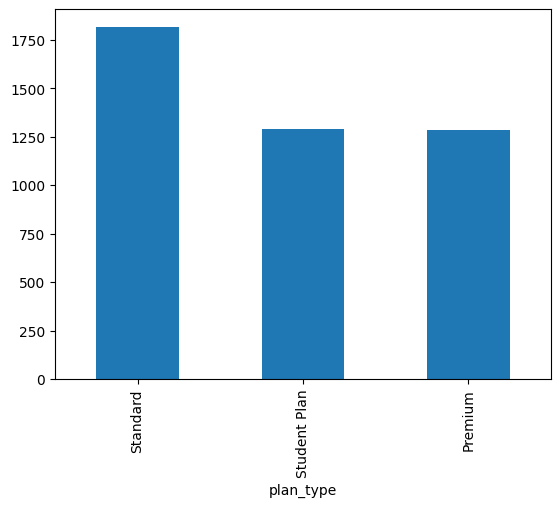

In [9]:
subscription['plan_type'].value_counts().plot(kind='bar')

### hence we can have more number of standard then other

In [10]:
subscription['valid_until'] = pd.to_datetime(subscription['valid_until'])
subscription['payment_date'] = pd.to_datetime(subscription['payment_date'])
subscription['validity_days'] = (subscription['valid_until'] - subscription['payment_date']).dt.days

In [11]:
subscription.head(10)

,payment_id,user_id,amount,payment_date,plan_type,valid_until,churn_status,renewed,validity_days
0,T67951961023,15000,12.99,2024-11-01,Premium,2024-12-31,active,True,60
1,T68965430008,15000,12.99,2025-01-05,Premium,2025-03-06,active,True,60
2,T56296958896,15000,7.99,2025-03-08,Standard,2025-04-07,active,True,30
3,T77025305054,15001,7.99,2024-11-01,Standard,2024-12-01,active,True,30
4,T73938493845,15001,7.99,2024-12-04,Standard,2025-01-03,churned,False,30
5,T80595234029,15002,12.99,2024-11-01,Premium,2024-12-31,active,True,60
6,T73954774255,15002,12.99,2025-01-01,Premium,2025-03-02,active,True,60
7,T61837475327,15002,7.99,2025-03-04,Standard,2025-04-03,active,True,30
8,T71978840752,15003,12.99,2024-11-01,Premium,2024-12-31,active,True,60
9,T71946924698,15003,12.99,2025-01-01,Premium,2025-03-02,active,True,60


In [12]:
subscription['validity_days'].value_counts()

validity_days
30    3105
60    1284
Name: count, dtype: int64

In [13]:
subscription.drop_duplicates(inplace=True)

In [14]:
subscription.to_csv("subscription_modified.csv",index=False)